In [1]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from colossus.cosmology import cosmology
import scipy.interpolate as I
from src.template_generator import *
from src.build_lensing_maps import *

%matplotlib inline

/Users/jens/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jens/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [82]:
fnames = ['/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_2950.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3100.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3250.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3400.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3550.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3700.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3850.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_4000.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_4150.h5',
             '/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_4300.h5']

#fnames = ['/Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_2950.h5']


build_maps_isw(bsize=4000.,ngrid=256,qmin=np.array([-2200.0,-2000.0,-300.0]),filenames=fnames,random=False)

preparing maps...
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_2950.h5
-1.926607395017142 10.747214777836748
(-32508.545785904207-7092.153192875239j) (32445.035558874602+22993.504925379908j)


/Volumes/My Passport/cosmology/sdss3/lss_template_generator/src/template_generator.py:164: RuntimeWarning: divide by zero encountered in true_divide
  phi = -fac*(densft)/(kgrid**2)
/Volumes/My Passport/cosmology/sdss3/lss_template_generator/src/template_generator.py:164: RuntimeWarning: invalid value encountered in true_divide
  phi = -fac*(densft)/(kgrid**2)


TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3100.h5
-1.7631971020098312 8.633562840113589
(-35518.73706879771-3509.510982516108j) (31125.719026445808-2387.116158634829j)
TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3250.h5
-1.728578556587366 7.5190576857410765
(-29265.084584351644-7469.960993617438j) (28168.242081463766-11901.507597579108j)
TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3400.h5
-1.8663110292532554 7.18079806633752
(-31292.22559591855-3736.4841966623458j) (30198.661013920922+3843.1065947007637j)
TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3550.h5
-1.8242070508488752 7.856481777820305
(-34291.18671100909+16884.4655309322j) (29476.226222555655+14263.971369928102j)
TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain/mcmc_3700.h5
-1.752839192368

In [150]:
data=(np.load('/Volumes/My Passport/cosmology/sdss3/lss_template_generator/borg_isw_maps.npz'))['isw']


mean=np.average(data,axis=0)

data=data[0]

#load planck data
planck_isw=hp.read_map('/Volumes/My Passport/cosmology/sdss3/planck_data/COM_CompMap_ISW_0064_R2.00.fits')
planck_isw=hp.ud_grade(planck_isw, hp.npix2nside(len(data)))

#get sdss masks
mask_sdss=hp.read_map('/Volumes/My Passport/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_LOWZ_North.fits')+hp.read_map('/Volumes/My Passport/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_LOWZ_South.fits')
mask_sdss*=(hp.read_map('/Volumes/My Passport/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_CMASS_North.fits')+hp.read_map('/Volumes/My Passport/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_CMASS_South.fits'))
foo=np.where(mask_sdss>0)
mask_sdss[foo]=1
mask_sdss=hp.ud_grade(mask_sdss, hp.npix2nside(len(data)))
mask_new=change_coord(mask_sdss, 'CG')


foo=np.where(planck_isw<-1e+30)
mask_new[foo]=0

NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/Users/jens/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


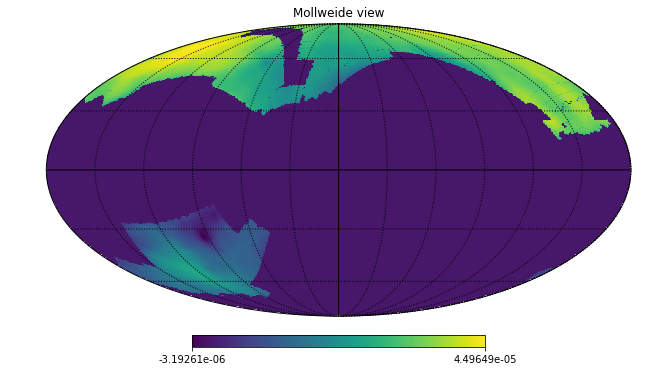

In [151]:
hp.mollview(mean*mask_new)
hp.graticule()
plt.show()

In [152]:
planck_isw=hp.read_map('/Volumes/My Passport/cosmology/sdss3/planck_data/COM_CompMap_ISW_0064_R2.00.fits')
planck_isw=hp.ud_grade(planck_isw, hp.npix2nside(len(data)))

NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


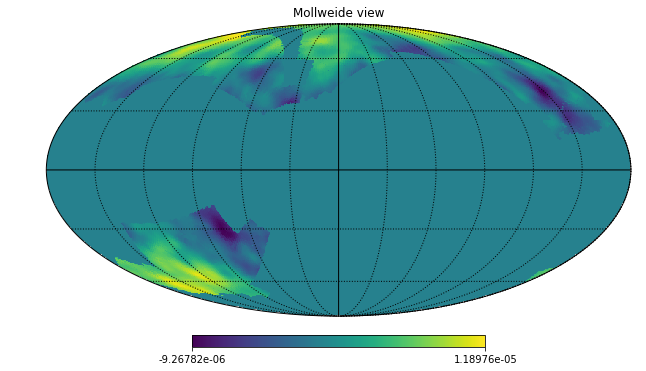

In [153]:
hp.mollview(planck_isw*mask_new)
hp.graticule()

In [154]:
foo=np.where(mask_new>0)
x=np.zeros(np.shape(data))
y=np.zeros(np.shape(data))
x[foo]=data[foo]
y[foo]=planck_isw[foo]

xxx=data[foo]
yyy=planck_isw[foo]

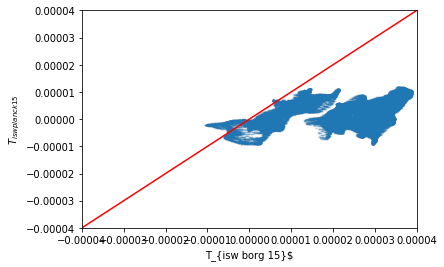

In [158]:
plt.xlim([-4e-5,4e-5])
plt.ylim([-4e-5,4e-5])
xx=np.linspace(-4e-5,4e-5,1000)
plt.scatter(xxx,yyy,marker='o',s=0.5, alpha=0.1)
plt.plot(xx,xx,color='red')
plt.ylabel(r'$T_{isw planck 15}$')
plt.xlabel(r'T_{isw borg 15}$')
plt.show()

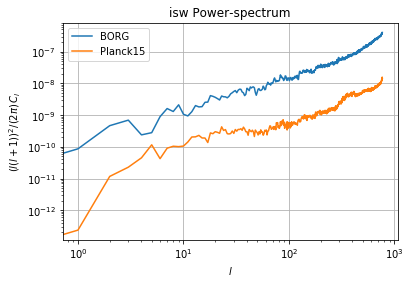

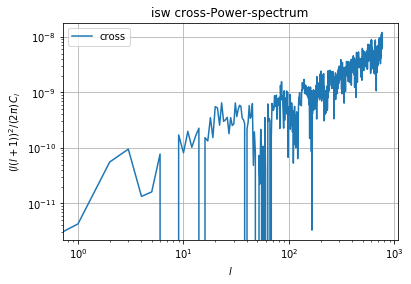

In [156]:
cl1=hp.sphtfunc.anafast(x)
cl2=hp.sphtfunc.anafast(y)
cl3=hp.sphtfunc.anafast(y,x)
ell = np.arange(len(cl1))
plt.title('isw Power-spectrum')
plt.loglog(ell, (ell * (ell+1))**2/(2.*np.pi) * cl1,label='BORG')
plt.loglog(ell, (ell * (ell+1))**2/(2.*np.pi) * cl2,label='Planck15')
plt.xlabel(r'$l$'); plt.ylabel(r'$(l(l+1))^2/(2\pi)\,C_l$'); plt.grid()
plt.legend()
plt.show()

plt.title('isw cross-Power-spectrum')
plt.loglog(ell, (ell * (ell+1))**2/(2.*np.pi) * cl3,label='cross')
plt.xlabel(r'$l$'); plt.ylabel(r'$(l(l+1))^2/(2\pi)\,C_l$'); plt.grid()
plt.legend()

plt.show()